In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
df = pd.read_csv(r"C:/E_Drive/Spring_22/CSP_554_Big_Data/Final_Project/Project_report_final/esp_32_dynamo_db.csv")

In [4]:
df.head()

,ts,Humidity,TDS,Temperature
0,1.650000e+12,11,73,46.200001
1,1.650000e+12,33,885,36.900002
2,1.650000e+12,42,966,31.799999
3,1.650000e+12,31,999,29.299999
4,1.650000e+12,31,904,35.200001


#  1. min, max, mean and SD of numeric fields

## Humidity

In [8]:
df['Humidity'].agg([np.min, np.max, np.mean, np.std, np.median])

amin      10.000000
amax      54.000000
mean      30.332558
std        7.893123
median    32.000000
Name: Humidity, dtype: float64

# TDS

In [9]:
df['TDS'].agg([np.min, np.max, np.mean, np.std, np.median])

amin         0.000000
amax      1061.000000
mean       605.733721
std        428.615520
median     879.000000
Name: TDS, dtype: float64

## Temperature

In [10]:
df['Temperature'].agg([np.min, np.max, np.mean, np.std, np.median])

amin      26.700001
amax      48.200001
mean      32.935465
std        5.437552
median    31.799999
Name: Temperature, dtype: float64

# 2. How do such values group - how many are between 1 and 10, 10 and 20, etc

## Humidity

In [47]:
bins = [0, 1, 10, 20, 30, 40, 50, 60]
df['hum_binned'] = pd.cut(df['Humidity'], bins)

In [48]:
df['hum_binned'].value_counts().sort_values(ascending=True)

(0, 1]        0
(1, 10]       6
(50, 60]      6
(40, 50]     27
(10, 20]    114
(20, 30]    192
(30, 40]    515
Name: hum_binned, dtype: int64

## TDS

In [53]:
bins_tds = [0, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]
df['tds_binned'] = pd.cut(df['TDS'], bins_tds)

In [54]:
df['tds_binned'].value_counts().sort_values(ascending=True)

(0, 10]           0
(200, 300]        0
(400, 500]        0
(600, 700]        0
(100, 200]        2
(500, 600]        2
(300, 400]        4
(700, 800]       25
(800, 900]      117
(1000, 1100]    163
(900, 1000]     211
(10, 100]       318
Name: tds_binned, dtype: int64

## Temperature

In [55]:
bins_temp = [0, 10, 20, 30, 40, 50 ]
df['temp_binned'] = pd.cut(df['Temperature'], bins_temp)

In [56]:
df['temp_binned'].value_counts().sort_values(ascending=True)

(0, 10]       0
(10, 20]      0
(40, 50]     92
(20, 30]    371
(30, 40]    397
Name: temp_binned, dtype: int64

# 3. Are there outliers that either need explanation or dropping? 

<AxesSubplot:xlabel='Temperature'>

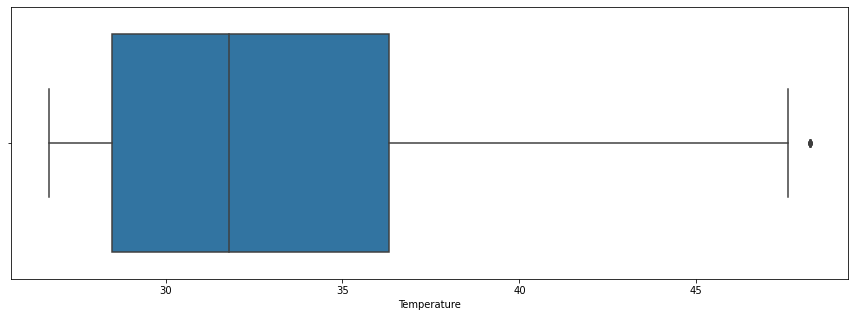

In [107]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['Temperature'])

<AxesSubplot:xlabel='Humidity'>

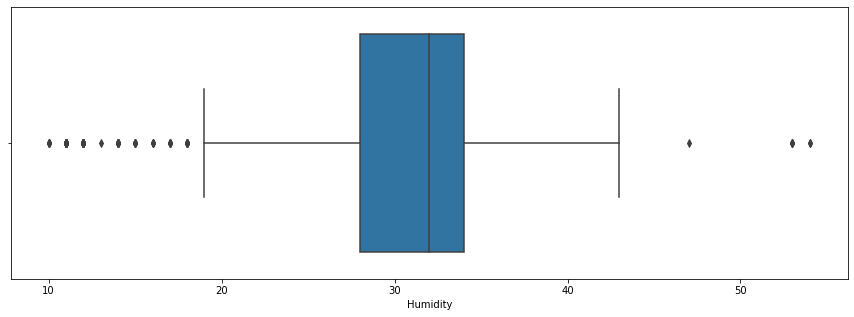

In [106]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['Humidity'])

<AxesSubplot:xlabel='TDS'>

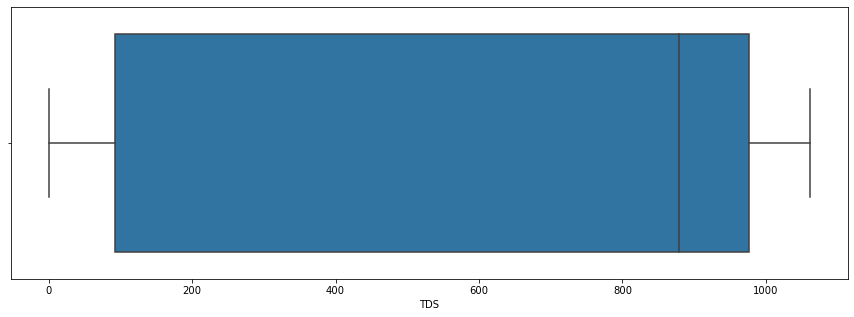

In [105]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['TDS'])

# 4. What about records with missing values?

<AxesSubplot:>

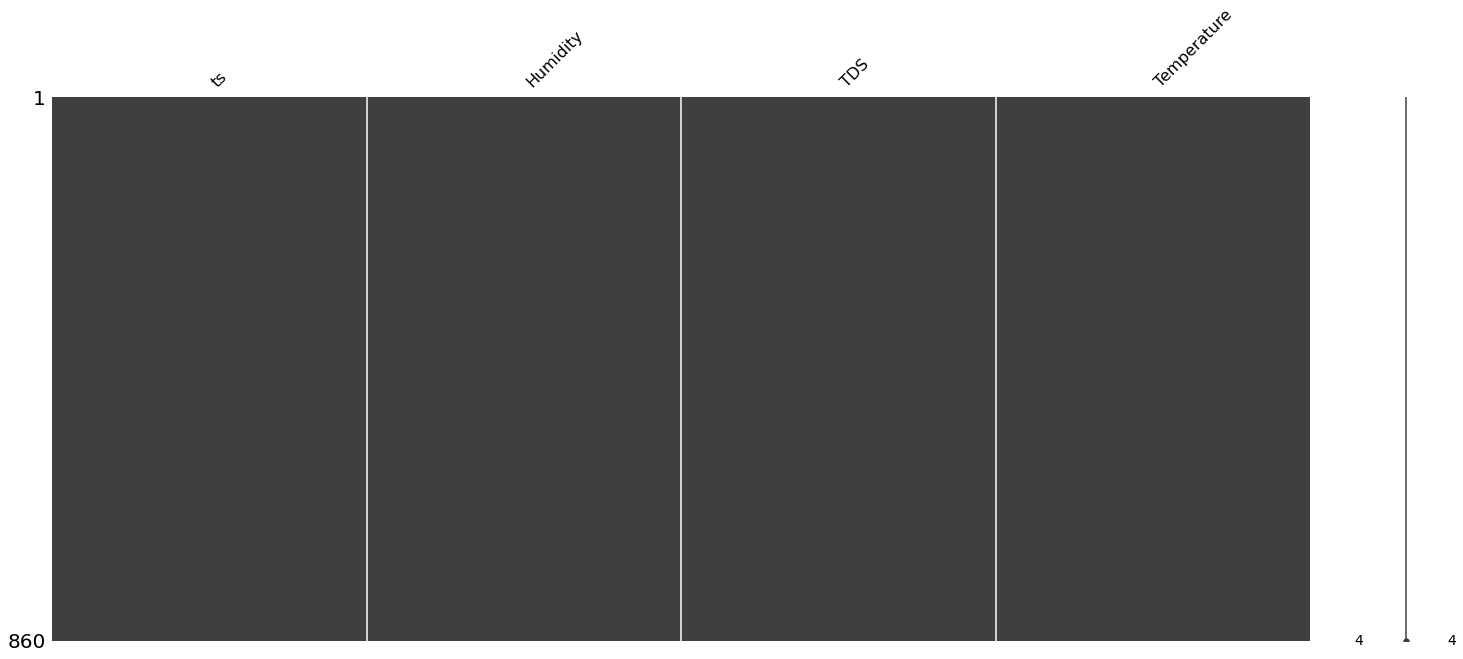

In [119]:
#There are no missing values, because they are handled at source. 
msno.matrix(df.iloc[:, :4])